In [ ]:
# Name= Muhammad Ahmad Bilal
# CMS ID= 245987

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Datasets-UCI.zip'

Archive:  /content/drive/MyDrive/Datasets-UCI.zip
replace Datasets-UCI/7_fl2000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import sklearn.tree
import matplotlib.pyplot as plt
import graphviz

In [ ]:
#My CMS ID is 245987
# 87 mod 21 = 3
# SO I WILL WORK ON e_analcatdata_dmft.csv
df = pd.read_csv('/content/Datasets-UCI/3_analcatdata_dmft.csv', sep=';')

In [ ]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,label
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,2
1,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,2
2,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,2
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,2
4,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,2


In [ ]:
feature_cols = list(df.columns.values)
feature_cols.remove('label')
X = df[feature_cols] # Features
y = df.label # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #Splitting into 80-20 ratio for training and testing respectively

In [ ]:
len(X_train) == len(y_train) #Validating the split

True

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy") #Checking for default depth value that is None 
#if default value=None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1875


>1, train: 0.207, test: 0.169
>2, train: 0.232, test: 0.163
>3, train: 0.253, test: 0.181
>4, train: 0.270, test: 0.206
>5, train: 0.295, test: 0.219
>6, train: 0.330, test: 0.188
>7, train: 0.358, test: 0.200
>8, train: 0.388, test: 0.175
>9, train: 0.427, test: 0.188
>10, train: 0.452, test: 0.175
>11, train: 0.476, test: 0.200
>12, train: 0.490, test: 0.169
>13, train: 0.502, test: 0.169
>14, train: 0.510, test: 0.194
>15, train: 0.516, test: 0.194
>16, train: 0.520, test: 0.188
>17, train: 0.526, test: 0.181
>18, train: 0.526, test: 0.181
>19, train: 0.526, test: 0.188
>20, train: 0.526, test: 0.194


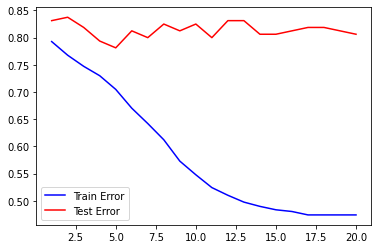

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)] #taking range equal number of features in the dataset
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(1-train_acc) #test_error = 1 - test_accuracy
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(1-test_acc) #test_error = 1 - test_accuracy
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-', label='Train Error',color='blue')
plt.plot(values, test_scores, '-', label='Test Error',color='red')
plt.legend()
plt.show()

In [ ]:
#After 5 the tree starts to get overfit on the training set
#As with decrease in training error the testing error remains between 0.80 - 0.83

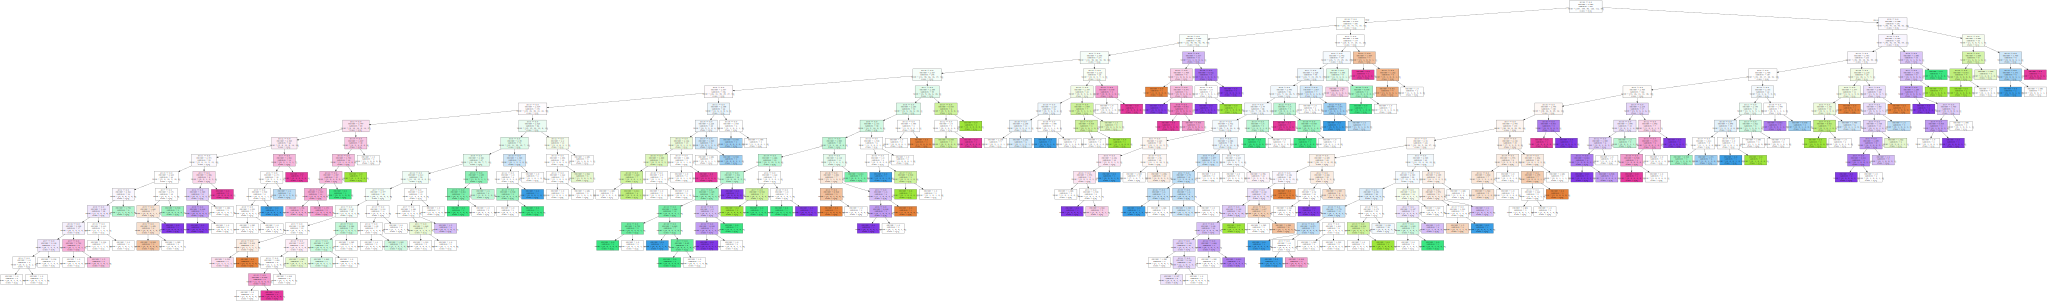

In [ ]:
# DOT data
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph